## **数据详情**

    Date：The date of observation
    Location：The common name of the location of the weather station
    MinTemp：The minimum temperature in degrees celsius
    MaxTemp：The maximum temperature in degrees celsius
    Rainfall：The amount of rainfall recorded for the day in mm
    Evaporation：The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine：The number of hours of bright sunshine in the day.
    WindGustDir：The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed：The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am：Direction of the wind at 9am
    WindDir3pm：Direction of the wind at 3pm
    WindSpeed9am：Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm：Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am：Humidity (percent) at 9am
    Humidity3pm：Humidity (percent) at 3pm
    Pressure9am：Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm：Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am：Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
    Cloud3pm：Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
    Temp9am：Temperature (degrees C) at 9am
    Temp3pm：Temperature (degrees C) at 3pm
    RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RISK_MM：The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
    RainTomorrow：The target variable. Did it rain tomorrow?

**特征详情**：

    Date：观察特征的那一天
    Location：观察的城市
    MinTemp：当天最低温度（摄氏度）
    MaxTemp：当天最高温度（摄氏度）温度都是 string
    Rainfall：当天的降雨量（单位是毫米mm）
    Evaporation：一个凹地上面水的蒸发量（单位是毫米mm），24小时内到早上9点
    Sunshine：一天中出太阳的小时数
    WindGustDir：最强劲的那股风的风向，24小时内到午夜
    WindGustSpeed：最强劲的那股风的风速（km/h），24小时内到午夜
    WindDir9am：上午9点的风向
    WindDir3pm：下午3点的风向
    WindSpeed9am：上午9点之前的十分钟里的平均风速，即 8:50~9:00的平均风速，单位是（km/hr）
    WindSpeed3pm：下午3点之前的十分钟里的平均风速，即 14:50~15:00的平均风速，单位是（km/hr）
    Humidity9am：上午9点的湿度
    Humidity3pm：下午3点的湿度
    Pressure9am：上午9点的大气压强（hpa）
    Pressure3pm：下午3点的大气压强
    Cloud9am：上午9点天空中云的密度，取值是[0, 8]，以1位一个单位，0的话表示天空中几乎没云，8的话表示天空中几乎被云覆盖了
    Cloud3pm：下午3点天空中云的密度
    Temp9am：上午9点的温度（单位是摄氏度）
    Temp3pm：下午3点的温度（单位是摄氏度）
    RainTodayBoolean: 今天是否下雨
    RISK_MM：明天下雨的风险值（应当是数据提供者创建的一个特征）
    来自数据提供者的提醒：Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. 就是建模的时候要删掉这个特征
    RainTomorrow：标签

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./weatherAUS.csv')

In [3]:
dataset.shape

(142193, 24)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [5]:
dataset.isnull().sum() / len(dataset)

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

### **单变量分析**

#### **离散值**

In [6]:
catgorical = [cat for cat in dataset.columns if dataset[cat].dtype == 'O']

In [7]:
catgorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
for i in catgorical:
    print(i)
    print(len(dataset[i].unique()))
    print()

Date
3436

Location
49

WindGustDir
17

WindDir9am
17

WindDir3pm
17

RainToday
3

RainTomorrow
2



date有非常多的唯一值，说明这个特征是high-cardinality

分别提取出里面的年月日

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [10]:
dataset['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
142188   2017-06-20
142189   2017-06-21
142190   2017-06-22
142191   2017-06-23
142192   2017-06-24
Name: Date, Length: 142193, dtype: datetime64[ns]

In [11]:
dataset['Date'].dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

In [12]:
year = dataset['Date'].dt.year
month = dataset['Date'].dt.month
day = dataset['Date'].dt.day

In [13]:
dataset.drop(labels=['Date'], axis=1, inplace=True)

In [14]:
dataset['year'] = year
dataset['month'] = month
dataset['day'] = day

In [15]:
dataset.shape

(142193, 26)

In [16]:
dataset.loc[:, catgorical].isnull().sum() / len(dataset)

d:\anaconda_file\lib\site-packages\pandas\core\indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Date            1.000000
Location        0.000000
WindGustDir     0.065615
WindDir9am      0.070418
WindDir3pm      0.026570
RainToday       0.009888
RainTomorrow    0.000000
dtype: float64

In [17]:
# 对于这些离散值来说，缺失的值的占比都比较少，所以都使用众数来填充即可

dataset_ = dataset.copy()

fill_list = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
fill_dict = {key: dataset_[key].mode().values[0] for key in fill_list}
fill_dict


# 这种方法是不行的
# for j in fill_list:
#     dataset_[j].fillna(dataset_[j].mode(), inplace=True)


dataset_.fillna(value=fill_dict, inplace=True)

In [18]:
cat = [_ for _ in dataset_.columns if dataset[_].dtype=='O']
dataset_.loc[:, cat].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### **连续值**

In [19]:
numerical = [_ for _ in dataset_.columns if dataset[_].dtype != 'O']
# 删去之前创建的 year, month, day
# 因为数据集的提供者已经说了 RISK_MM 会影响模型，所以连着删去
numerical = numerical[:-4]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [20]:
numerical_features = dataset_.loc[:, numerical]

numerical_features.isnull().sum() / numerical_features.shape[0]

MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustSpeed    0.065193
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64

In [21]:
numerical_features.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


**对比一下上四分位数和最大值，Rainfall、Evaporation、WindGustSpeed、WindSpeed9am、WindSpeed3pm**

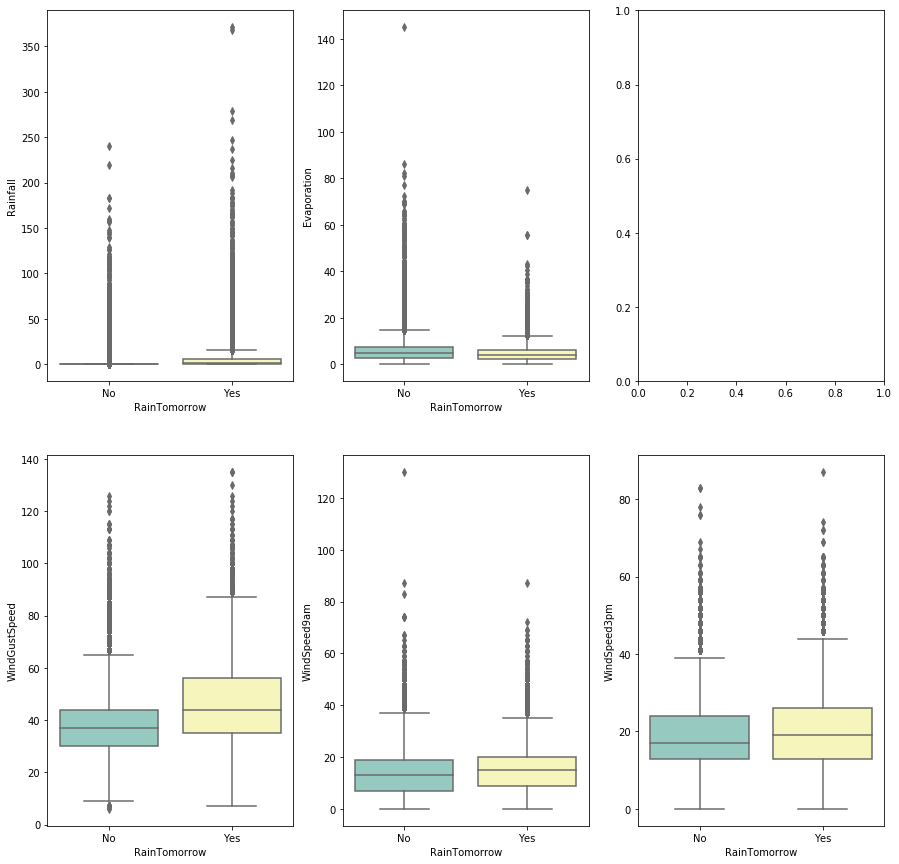

In [22]:
figure, axes = plt.subplots(2, 3, figsize=(15, 15))

sns.boxplot(
    x='RainTomorrow', y='Rainfall',
    data=dataset_, ax=axes[0, 0], palette="Set3"
)

sns.boxplot(
    x='RainTomorrow', y='Evaporation',
    data=dataset_, ax=axes[0, 1], palette="Set3"
)

sns.boxplot(
    x='RainTomorrow', y='WindGustSpeed',
    data=dataset_, ax=axes[1, 0], palette="Set3"
)

sns.boxplot(
    x='RainTomorrow', y='WindSpeed9am',
    data=dataset_, ax=axes[1, 1], palette="Set3"
)

sns.boxplot(
    x='RainTomorrow', y='WindSpeed3pm',
    data=dataset_, ax=axes[1, 2], palette="Set3"
)

plt.show()

**在箱线图中看到，对于这几个连续值，里面的异常值还是挺多的**

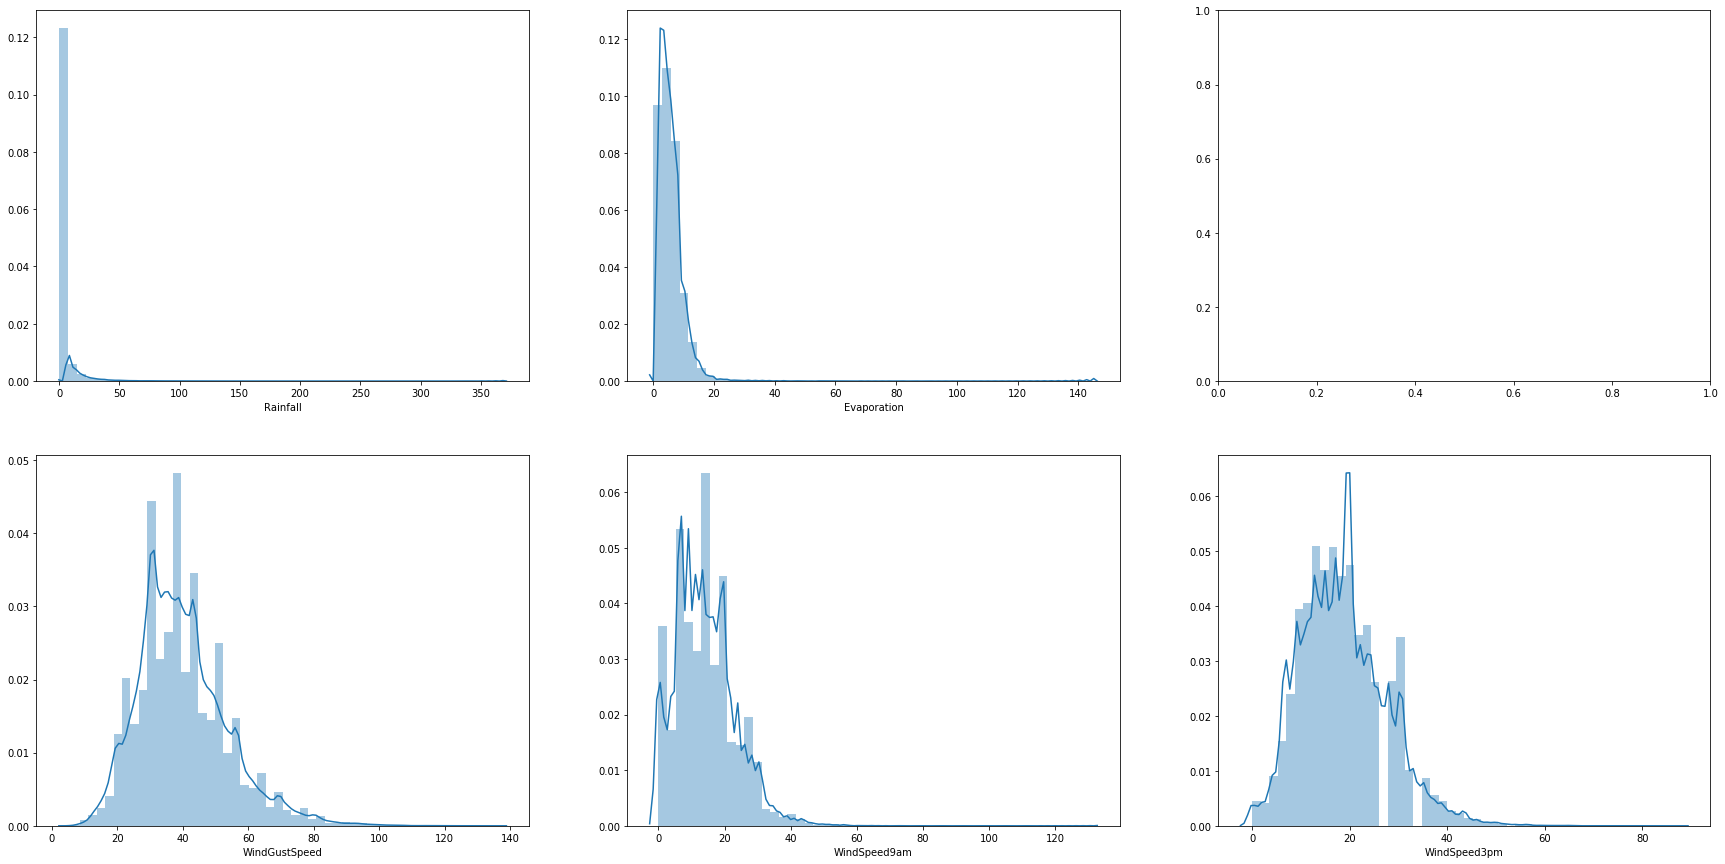

In [23]:
# 查看连续值的分布情况

figure, axes = plt.subplots(2, 3, figsize=(30, 15))

sns.distplot(
    a=dataset_['Rainfall'].dropna(),
    ax=axes[0, 0]
)

sns.distplot(
    a=dataset_['Evaporation'].dropna(),
    ax=axes[0, 1]
)

sns.distplot(
    a=dataset_['WindGustSpeed'].dropna(),
    ax=axes[1, 0]
)

sns.distplot(
    a=dataset_['WindSpeed9am'].dropna(),
    ax=axes[1, 1]
)

sns.distplot(
    a=dataset_['WindSpeed3pm'].dropna(),
    ax=axes[1, 2]
)

plt.show()

**对于这几个连续型特征，都出现比较明显的偏斜，使用 interquantile range 去寻找离群值** 

In [24]:
_list = ['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']

def find_outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (df[feature] < Lower_fence).sum()
    out_of_top = (df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')
    
    
for feature in _list:
    find_outliers(dataset_, feature)
    print()

Rainfall outliers are values < -2.4000000000000004 or > 3.2
the number of upper outlier 20462
the number of lower outlier 0

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
the number of upper outlier 471
the number of lower outlier 0

WindGustSpeed outliers are values < -20.0 or > 99.0
the number of upper outlier 150
the number of lower outlier 0

WindSpeed9am outliers are values < -29.0 or > 55.0
the number of upper outlier 107
the number of lower outlier 0

WindSpeed3pm outliers are values < -20.0 or > 57.0
the number of upper outlier 81
the number of lower outlier 0



**对于 Rainfall 这个特征而言，Australia 的情况应该是，一下雨就降雨量很大的那种，所以不打算砍掉 Rainfall 的 上四分位数 + 3*IQR 以上的值，其他的4个特征全部砍掉这些异常值**

In [25]:
# 先进行中位数填充缺失的连续值，在进行异常值的处理

# 当数据集中有离群值的时候，应当使用中位数进行填充
'''
进行缺失值填充的时候要注意的点是：
要进行填充的值的计算，一定是要使用训练集计算出来的，这样才能减少过拟合。

使用训练集计算出来的中位数对训练集和测试集的对应特征进行填充
'''
def fill_max(feature):
    pass

In [26]:
dataset_.drop(columns=['RISK_MM'], inplace=True)

In [27]:
dataset_.shape

(142193, 25)

In [28]:
X = dataset_.drop(columns=['RainTomorrow'])
y = dataset_['RainTomorrow']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train_test_split 进行训练集和测试集的分配之后，X_train 等都是 dataframe
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [30]:
# 计算训练集的中位数，用这个中位数填充

for df1 in (X_train, X_test):
    for j in numerical:
        col_median = X_train[j].median()
        df1[j].fillna(col_median, inplace=True)

d:\anaconda_file\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
X_train.isnull().sum(), X_test.isnull().sum()

(Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 year             0
 month            0
 day              0
 dtype: int64, Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 year             0
 month            0
 day              0
 dtype: int64)

In [32]:
# 处理除了 Rainfall 之外的连续值的超出 上四分位数 + 3*IQR 的离群值进行修改
# 前面可以看到小于 下四分位数 - 3*IQR 的值是没有的 


def process_outliers(df3, Top, feature_):
    return np.where(df3[feature_] > Top, Top, df3[feature_])

'''threshold
Evaporation

21.800000000000004

WindGustSpeed

99.0

WindSpeed9am

55.0

WindSpeed3pm

57.0
'''


threshold_dict = {'Evaporation': 21.8, 'WindGustSpeed': 99.0, 'WindSpeed9am': 55.0, 'WindSpeed3pm': 57.0}
_list = ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

for df3 in (X_train, X_test):
    for feature in _list:
        top = threshold_dict.get(feature)
        df3[feature] = process_outliers(df3, top, feature)

d:\anaconda_file\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
X_train[_list].max(), X_test[_list].max()

(Evaporation      21.8
 WindGustSpeed    99.0
 WindSpeed9am     55.0
 WindSpeed3pm     57.0
 dtype: float64, Evaporation      21.8
 WindGustSpeed    99.0
 WindSpeed9am     55.0
 WindSpeed3pm     57.0
 dtype: float64)

In [34]:
# 对离散值进行独热编码

catgorical = [
    'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
]

for i in catgorical:
    print(X_train.loc[:, i].value_counts())

Canberra            2717
Sydney              2671
Hobart              2593
Darwin              2560
Brisbane            2550
Perth               2548
Ballarat            2448
Adelaide            2446
MountGambier        2434
Sale                2420
Watsonia            2420
MelbourneAirport    2415
Nuriootpa           2413
Bendigo             2412
PerthAirport        2412
AliceSprings        2411
Woomera             2410
Cobar               2408
SydneyAirport       2407
Launceston          2404
WaggaWagga          2403
Tuggeranong         2402
Albury              2393
Townsville          2389
Wollongong          2385
Portland            2384
Albany              2382
BadgerysCreek       2381
NorfolkIsland       2380
Penrith             2379
Newcastle           2378
CoffsHarbour        2377
Cairns              2372
Mildura             2369
Dartmoor            2358
Witchcliffe         2356
GoldCoast           2346
NorahHead           2344
Richmond            2340
SalmonGums          2338


In [35]:
X_train = X_train.replace({'No': 0, 'Yes': 1})
X_test = X_test.replace({'No': 0, 'Yes': 1})

In [36]:
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()

X_train_temp = pd.get_dummies(X_train_temp, columns=catgorical, drop_first=True)
X_test_temp = pd.get_dummies(X_test_temp, columns=catgorical, drop_first=True)

X_train_temp.shape, X_test_temp.shape

((113754, 113), (28439, 113))

In [37]:
X_train_temp

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_1
136356,25.7,32.4,0.0,6.2,8.9,37.0,19.0,17.0,77.0,56.0,...,1,0,0,0,0,0,0,0,0,0
7859,4.8,16.8,0.0,5.0,8.5,57.0,20.0,30.0,25.0,18.0,...,0,0,0,0,0,0,0,1,0,0
50687,3.8,21.2,0.0,4.8,8.5,22.0,4.0,9.0,73.0,32.0,...,0,0,0,0,0,0,0,0,0,0
98843,12.1,19.2,7.6,1.6,5.3,31.0,15.0,20.0,100.0,69.0,...,0,0,0,0,0,0,0,1,0,1
5568,8.4,20.1,0.2,4.8,8.5,20.0,6.0,4.0,93.0,52.0,...,0,0,0,0,0,0,0,0,0,0
65680,15.2,22.1,8.4,2.2,5.9,46.0,30.0,28.0,83.0,64.0,...,0,0,0,0,0,0,0,0,0,1
77586,16.0,17.3,17.2,1.8,0.0,20.0,13.0,11.0,70.0,100.0,...,0,0,0,0,0,0,0,0,0,1
27323,16.4,30.6,0.0,5.2,8.5,39.0,2.0,26.0,84.0,60.0,...,0,0,1,0,0,0,0,0,0,0
140868,7.6,34.2,0.0,4.8,8.5,61.0,4.0,37.0,22.0,11.0,...,1,0,0,0,0,0,0,0,0,0
2389,10.2,23.1,0.0,4.8,8.5,17.0,7.0,11.0,66.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler

X = pd.concat([X_train_temp, X_test_temp])
y = pd.concat([y_train, y_test])
print(X.shape)
print(y.shape)


scaler = StandardScaler()
X_train_temp = scaler.fit_transform(X_train_temp)
X_test_temp = scaler.fit_transform(X_test_temp)


y

(142193, 113)
(142193,)


136356    Yes
7859       No
50687      No
98843      No
5568       No
         ... 
67274      No
107403    Yes
69336      No
48522      No
4650      Yes
Name: RainTomorrow, Length: 142193, dtype: object

### **建模方法**

因选择使用逻辑回归，训练速度快

    1.直接套模型
    2.递归特征消除
    3.嵌入法

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_temp, y_train)

d:\anaconda_file\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
LR.score(X_test_temp, y_test)

0.8482365765322268

In [42]:
%%time
import warnings
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

LR = LogisticRegression(n_jobs=-1)

cross_val_score(LR, X, y, cv=10, n_jobs=-1)

Wall time: 25.1 s


array([0.84331927, 0.84472574, 0.84739803, 0.84704641, 0.84535865,
       0.84936709, 0.84893452, 0.8432269 , 0.84589956, 0.84414123])

In [43]:
LR = LogisticRegression()
LR.fit(X_train_temp, y_train)
LR.score(X_train_temp, y_train)

0.8483218172547778

In [45]:
LR.score(X_test_temp, y_test)

0.8482365765322268

使用训练集的准确率和使用测试集的准确率差不多

#### **模型评估**

In [49]:
from sklearn.metrics import confusion_matrix

y_pre_test = LR.predict(X_test_temp)

cm = confusion_matrix(y_test, y_pre_test)
cm

array([[20895,  1217],
       [ 3099,  3228]], dtype=int64)

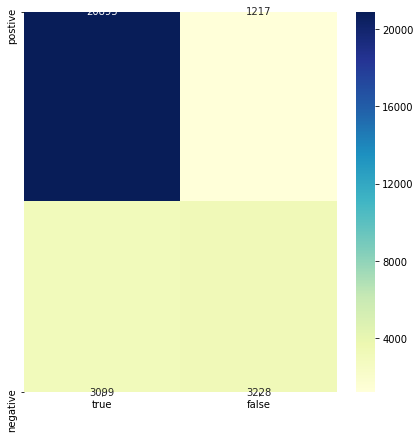

In [56]:
cm_matrix = pd.DataFrame(cm, columns=['true', 'false'], index=['postive', 'negative'])
plt.figure(figsize=(7,7))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pre_test))

              precision    recall  f1-score   support

          No       0.87      0.94      0.91     22112
         Yes       0.73      0.51      0.60      6327

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [61]:
from sklearn.metrics import recall_score, precision_score

y_test = np.where(y_test=='No', 0, 1)
y_pre_test = np.where(y_pre_test=='No', 0, 1)

print(precision_score(y_test, y_pre_test)) # 原来这个指标是可以设置 pos_label 的，这样即使是字符串的标签 'No' 'Yes' 也不用鸟了
print(recall_score(y_test, y_pre_test))

0.7262092238470191
0.510194404931247


In [62]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pre_test)

0.5993316004455997

In [63]:
0.8*0.8*2/1.6

0.8000000000000002

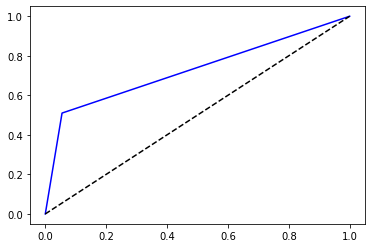

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pre_test)
plt.plot(fpr, tpr, c='b')
plt.plot([0,1], [0,1], 'k--')

In [65]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pre_test)

In [66]:
ROC_AUC

0.7275782082543355

In [74]:
%%time
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=LR, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train_temp, y_train)

Wall time: 17min 18s


In [75]:
X_train_rfecv = rfecv.transform(X_train_temp)
print(X_train_rfecv.shape)
LR.fit(X_train_rfecv, y_train)
X_test_rfecv = rfecv.transform(X_test_temp)
y_pred_rfecv = LR.predict(X_test_rfecv)

(113754, 100)


In [86]:
from sklearn.metrics import accuracy_score

y_test = np.where(y_test==0, 'No', 'Yes')
LR.score(X_test_rfecv, y_test)

0.8479552726889131

In [88]:
%%time
from sklearn.model_selection import GridSearchCV


parameters = [
              {'C':list(range(50, 500, 25))}
               ]
LR = LogisticRegression(penalty='l1', n_jobs=-1)


grid_search = GridSearchCV(estimator = LR,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_temp, y_train)

Wall time: 9min 8s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l1',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275,
                                300, 325, 350, 375, 400, 425, 450, 475]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [90]:
grid_search.best_score_, grid_search.best_params_

(0.8479174358703869, {'C': 125})

In [72]:
%%time
# 嵌入法
from sklearn.feature_selection import SelectFromModel

X_embedded = SelectFromModel(grid_search.best_estimator_, norm_order=1).fit_transform(X_train_temp, y_train)

Wall time: 3.6 s


In [73]:
cross_val_score(grid_search.best_estimator_, X_embedded, ,cv=10).mean()

ValueError: Found input variables with inconsistent numbers of samples: [113754, 142193]

**查看模型的效果----通过模型预测的概率的分布**

In [95]:
# LR.predict_proba(X_test) 可以获得对应的样本的预测值为 1 的概率

LR = LogisticRegression(C=125)
LR.fit(X_train_temp, y_train)
y_predict_proba = LR.predict_proba(X_test_temp)

In [97]:
y_predict_proba # 第0列和第一列分别为这个样本对应的标签为0和1的概率

array([[0.79898701, 0.20101299],
       [0.86553243, 0.13446757],
       [0.77149679, 0.22850321],
       ...,
       [0.98964495, 0.01035505],
       [0.83904762, 0.16095238],
       [0.17714232, 0.82285768]])

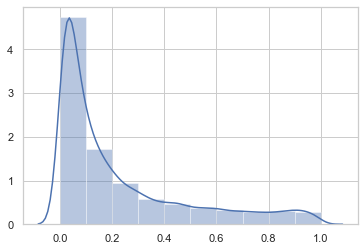

In [101]:
sns.set(style="whitegrid")
sns.distplot(a=y_predict_proba[:, 1], bins=10)

(array([13451.,  4906.,  2661.,  1638.,  1341.,  1073.,   908.,   809.,
          838.,   814.]),
 array([8.40201955e-04, 1.00724269e-01, 2.00608337e-01, 3.00492404e-01,
        4.00376471e-01, 5.00260538e-01, 6.00144606e-01, 7.00028673e-01,
        7.99912740e-01, 8.99796807e-01, 9.99680875e-01]),
 <a list of 10 Patch objects>)

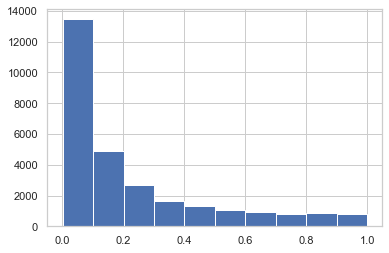

In [103]:
plt.hist(y_predict_proba[:, 1], bins=10)

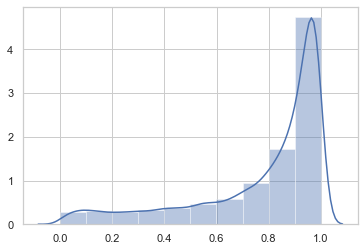

In [102]:
sns.distplot(a=y_predict_proba[:, 0], bins=10)

    1.概率分布严重偏斜
    2.可以发现对于标签为 1 的样本，大部分预测的概率都是小于0.5的，所以感觉置信度不太高

**# todo 对于样本严重的不平衡问题，使用上采样的方法**

##### **随机森林**

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_temp, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
rfc.score(X_test_temp, y_test) # 我吐了，调了那么久的LR，应该全部模型都跑一遍。。

0.856886669714125

**随机森林调参**

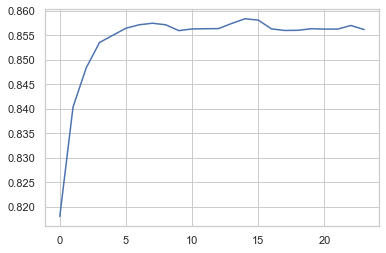

Wall time: 17min 9s


In [106]:
%%time

m_list = []

for depth in range(5, 100, 4):
    rfc = RandomForestClassifier(n_estimators=150, max_depth=depth)
    rfc.fit(X_train_temp, y_train)
    score = rfc.score(X_test_temp, y_test)
    m_list.append(score)
    
plt.plot(m_list)
plt.show()

In [109]:
m_list.index(max(m_list))

14

In [110]:
m_list[14]

0.858328351911108

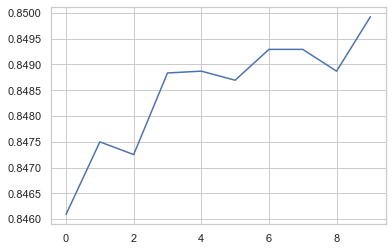

In [111]:
score_list = list()

for num in range(500, 1500, 100):
    rfc = RandomForestClassifier(n_estimators=200, max_depth=14, max_leaf_nodes=num, n_jobs=-1)
    rfc.fit(X_train_temp, y_train)
    score = rfc.score(X_test_temp, y_test)
    score_list.append(score)
    
plt.plot(x=score_list, y=score_list)
plt.show()

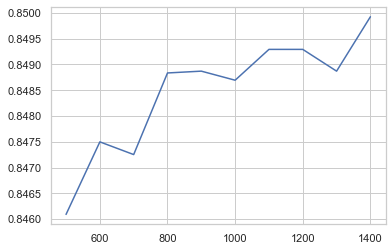

In [114]:
plt.plot(list(range(500, 1500, 100)),score_list)
plt.show()

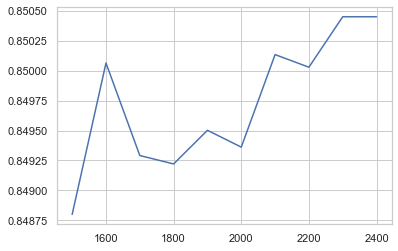

In [115]:
%matplotlib inline
# 显然预测的评分是被限制了，max_leaf_nodes还要提高
del score_list
score_list = []

for k in range(1500, 2500, 100):
    rfc = RandomForestClassifier(n_estimators=200, max_depth=14, max_leaf_nodes=k, n_jobs=-1)
    rfc.fit(X_train_temp, y_train)
    score = rfc.score(X_test_temp, y_test)
    score_list.append(score)
    
    
plt.plot(range(1500, 2500, 100), score_list)
plt.show()

In [116]:
%%time
rfc = RandomForestClassifier(n_estimators=200, max_depth=19, max_features=17, max_leaf_nodes=1100, n_jobs=-1)
rfc.fit(X_train_temp, y_train)
rfc.score(X_test_temp, y_test)

Wall time: 24.9 s


0.8518583635148915

In [119]:
from imblearn.over_sampling import SMOTE

# smote = SMOTE(ratio='minority')
# X_train_f_sm, y_train_sm = smote.fit_sample(X_train_temp, y_train)
# Ensure columns are homogeneous - imblearn recasts as numpy array
# X_train_f_sm = pd.DataFrame(X_train_f_sm, columns=X_train_temp.columns)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_f_sm, y_train_sm)
rfc.score(X_test_temp, y_test)

0.3202995885931292

In [120]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

gaussian_ = GaussianNB()
gaussian_.fit(X_train_temp, y_train)
gaussian_.score(X_test_temp, y_test)

0.6483701958578009

In [121]:
mut_ = MultinomialNB()
mut_.fit(X_train_temp, y_train)
mut_.score(X_test_temp, y_test)

ValueError: Input X must be non-negative

In [122]:
mut_ = ComplementNB()
mut_.fit(X_train_temp, y_train)
mut_.score(X_test_temp, y_test)

ValueError: Input X must be non-negative

In [135]:
LR = LogisticRegression(C=10,penalty='l1')
LR.fit(X_train_temp, y_train)
LR.score(X_test_temp, y_test)

0.8482014135518127

In [139]:
%%time
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(50, 50), random_state=1)

clf.fit(X_train_temp, y_train)

Wall time: 2min 44s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
clf.score(X_test_temp, y_test)

0.8431731073525792